<a href="https://colab.research.google.com/github/chelsea591/Machine_Learning_Qlab_PC/blob/ejercicio-2.2/PC1/PC_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2.2. Análisis de Estabilidad

In [13]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import warnings

# Configuraciones básicas
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid') # Estilo limpio para gráficos

In [15]:
# Cargamos los datos
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

**Pregunta 1.** LOOCV produce siempre el mismo resultado independientemente de la semilla porque no depende de una partición aleatoria. Por lo tanto, no introduce variabilidad estocástica, a diferencia de ambos métodos vistos.

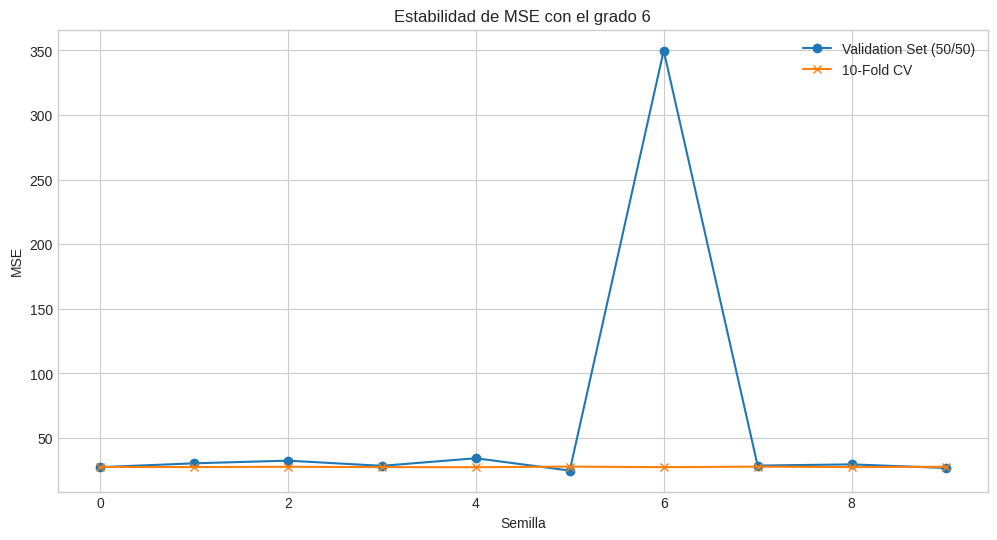

In [16]:
# Grado óptimo: 6
best_degree = 6

# Modelo polinomial
X = df[['lstat']]   # DataFrame
y = df['medv']

model = make_pipeline(
    PolynomialFeatures(degree=best_degree, include_bias=False),
    LinearRegression()
)

# Simulación
seeds = range(10)
mse_valset = []
mse_kfold = []

for n in seeds:
    # 1. Conjunto de validación (50/50)
    # Dividimos los datos: 50% entrenamiento, 50% validación con semilla cambiante)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=n
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_valset.append(mean_squared_error(y_test, y_pred))

    # 2. Validación cruzada en K-grupos
    kf = KFold(n_splits=10, shuffle=True, random_state=n)
    scores = cross_val_score(
        model, X, y,
        cv=kf,
        scoring="neg_mean_squared_error"
    )
    mse_kfold.append(-scores.mean())

mse_valset = np.array(mse_valset)
mse_kfold = np.array(mse_kfold)

# Graficamos  ambos métodos
plt.figure(figsize=(12, 6))
plt.plot(list(seeds), mse_valset, marker="o", label="Validation Set (50/50)")
plt.plot(list(seeds), mse_kfold, marker="x", label="10-Fold CV")
plt.xlabel("Semilla")
plt.ylabel("MSE")
plt.title(f"Estabilidad de MSE con el grado 6")
plt.grid(True)
plt.legend()
plt.show()

**Pregunta 2.** El Conjunto de Validación (50/50) presenta una mayor desviación estándar, lo que indica mayor variabilidad del error frente a cambios en la semilla.

Esta alta variabilidad es problemática porque implica que la evaluación del modelo depende fuertemente de una única partición aleatoria, lo que puede llevar a conclusiones inestables o poco confiables.
En contraste, el 10-Fold CV reduce la varianza del estimador del error al promediar múltiples particiones, proporcionando una estimación más robusta de la capacidad de generalización del modelo.